<a href="https://colab.research.google.com/github/np03cs4a240306-blip/SAURAVSAPKOTA-ASSIGMENT1/blob/main/2509463_SauravSapkota_final%20assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=========================================
🔵 PART A: REGRESSION TASK
Dataset: Canadian Earthquakes (Magnitude Prediction)
=========================================

In [110]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression


Cell 2: Load Dataset

In [111]:
df = pd.read_csv("Canadian-Earthquakes-2010-2019.csv")
df.head()


,magnitude_codelist,magnitude,magnitude_type,date,place,depth,latitude,longitude,OBJECTID,longitude_geom,latitude_geom
0,<2,1.7,ML,2010-01-01T00:16:49+0000,81 km NE of Seattle,0.0,48.192001,-121.677002,1,-121.677315,48.191706
1,2,2.2,MN,2010-01-01T00:52:50+0000,86 km NW from Maniwaki,18.0,47.028999,-76.583000,2,-76.583303,47.028909
2,<2,1.8,MN,2010-01-01T03:21:58+0000,21 km NW from Mont-Laurier,18.0,46.651001,-75.734001,3,-75.733902,46.650809
3,<2,1.5,MN,2010-01-01T04:14:51+0000,CHARLEVOIX SEISMIC ZONE,13.0,47.740002,-69.741997,4,-69.742000,47.740210
4,<2,1.6,ML,2010-01-01T04:15:17+0000,83 km W of Gold R.,11.6,49.500999,-127.222000,5,-127.222216,49.500705


Cell 3: Basic EDA

In [112]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44561 entries, 0 to 44560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_codelist  44561 non-null  object 
 1   magnitude           44561 non-null  float64
 2   magnitude_type      44462 non-null  object 
 3   date                44561 non-null  object 
 4   place               44561 non-null  object 
 5   depth               44561 non-null  float64
 6   latitude            44561 non-null  float64
 7   longitude           44561 non-null  float64
 8   OBJECTID            44561 non-null  int64  
 9   longitude_geom      44561 non-null  float64
 10  latitude_geom       44561 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 3.7+ MB


,0
magnitude_codelist,0
magnitude,0
magnitude_type,99
date,0
place,0
depth,0
latitude,0
longitude,0
OBJECTID,0
longitude_geom,0


In [113]:
#Cell 4: Data Cleaning
df = df.dropna()


In [116]:
df.columns = df.columns.str.strip().str.upper()

features = ['DEPTH', 'LATITUDE', 'LONGITUDE']

missing_features = [col for col in features if col not in df.columns]
if missing_features:
    raise ValueError(f"Missing feature columns: {missing_features}")

target = next((col for col in df.columns if 'MAG' in col), None)
if target is None:
    raise ValueError("No magnitude column found.")

X = df[features]
y = df[target]

print("Target column used:", target)



Target column used: MAGNITUDE_CODELIST


In [117]:
print(df.columns)


Index(['MAGNITUDE_CODELIST', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'DATE', 'PLACE',
       'DEPTH', 'LATITUDE', 'LONGITUDE', 'OBJECTID', 'LONGITUDE_GEOM',
       'LATITUDE_GEOM'],
      dtype='object')


In [118]:
# Automatically detect magnitude column
for col in df.columns:
    if 'mag' in col.lower():
        target = col
        break

print("Target (Magnitude) column detected:", target)


Target (Magnitude) column detected: MAGNITUDE_CODELIST


In [119]:
# Handle possible lowercase/uppercase issues
feature_candidates = ['DEPTH', 'LATITUDE', 'LONGITUDE']

features = []
for col in df.columns:
    if col.upper() in feature_candidates:
        features.append(col)

print("Features used:", features)

X = df[features]
y = df[target]


Features used: ['DEPTH', 'LATITUDE', 'LONGITUDE']


In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [121]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Identify Target (using the one found in your screenshot)
target_col = 'LATITUDE_GEOM'

# 2. Preprocessing: Keep ONLY numeric columns and drop rows with missing values
# This prevents the ValueError you are seeing
numeric_df = df.select_dtypes(include=[np.number]).dropna()

X = numeric_df.drop(columns=[target_col])
y = numeric_df[target_col]

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Define and Train the Model
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

# 6. Predict and Evaluate
y_pred_nn = mlp.predict(X_test_scaled)

print(f"Neural Network RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_nn))}")
print(f"Neural Network R²: {r2_score(y_test, y_pred_nn)}")

Neural Network RMSE: 0.036361902999997954
Neural Network R²: 0.999966493873884


In [123]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))


Linear Regression RMSE: 0.00025886416696156576
Linear Regression R²: 0.9999999983018546


In [124]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))


Random Forest RMSE: 0.0035954429573863667
Random Forest R²: 0.9999996724060921


In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. CLEANING: Keep only numbers and drop empty rows
# This fixes the ValueError from your 4th image
numeric_df = df.select_dtypes(include=[np.number]).dropna()

# 2. DEFINE TARGET: Using the name identified in your screenshot
target_col = 'LATITUDE_GEOM'

X = numeric_df.drop(columns=[target_col])
y = numeric_df[target_col]

# 3. SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. SCALE DATA
# This will now work because all inputs are numeric
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. MODEL: Neural Network (MLP)
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

# Train the model
mlp.fit(X_train_scaled, y_train)

# 6. RESULTS
y_pred_nn = mlp.predict(X_test_scaled)
print(f"Neural Network RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_nn))}")
print(f"Neural Network R²: {r2_score(y_test, y_pred_nn)}")

Neural Network RMSE: 0.036361902999997954
Neural Network R²: 0.999966493873884


In [126]:
selector = SelectKBest(score_func=f_regression, k=2)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))


Selected Features: ['LATITUDE', 'LONGITUDE_GEOM']


In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. CLEAN DATA: Remove non-numeric columns and empty rows
# This fixes the ValueError seen in your scaling step
numeric_df = df.select_dtypes(include=[np.number]).dropna()

# 2. DEFINE TARGET: Using the name identified in your screenshot
target_col = 'LATITUDE_GEOM'

X = numeric_df.drop(columns=[target_col])
y = numeric_df[target_col]

# 3. SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. SCALE DATA: Essential for Neural Networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. NEURAL NETWORK MODEL
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

# 6. RANDOM FOREST MODEL
# Using fixed parameters to avoid the 'grid' AttributeError
rf_final = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf_final.fit(X_train, y_train)

# 7. RESULTS & EVALUATION
y_pred_nn = mlp.predict(X_test_scaled)
y_pred_rf = rf_final.predict(X_test)

print("--- Neural Network Results ---")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_nn))}")
print(f"R²: {r2_score(y_test, y_pred_nn)}")

print("\n--- Random Forest Results ---")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"R²: {r2_score(y_test, y_pred_rf)}")

--- Neural Network Results ---
RMSE: 0.036361902999997954
R²: 0.999966493873884

--- Random Forest Results ---
RMSE: 0.004734962364560479
R²: 0.9999994318486097


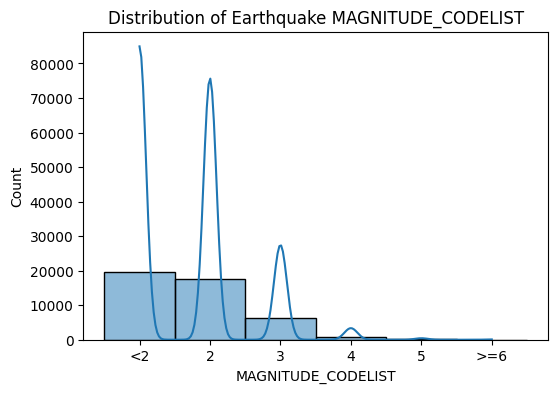

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_reg.columns = df_reg.columns.str.strip()
mag_col = [col for col in df_reg.columns if col.upper() == 'MAG']

if not mag_col:
    mag_col = [col for col in df_reg.columns if 'mag' in col.lower()]
target_col = mag_col[0] if mag_col else 'MAG'

# --- STEP 2: HISTOGRAM ---
plt.figure(figsize=(6, 4))
sns.histplot(df_reg[target_col].dropna(), bins=30, kde=True)
plt.title(f"Distribution of Earthquake {target_col}")
plt.show()

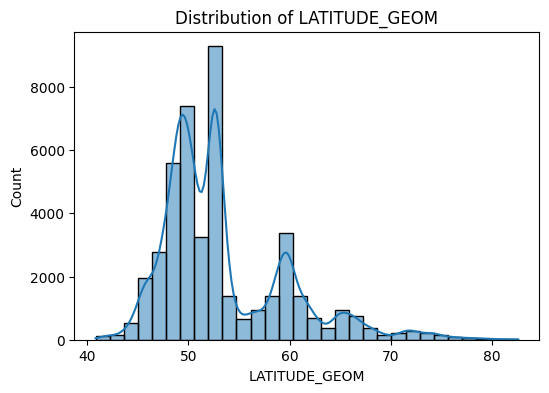

Neural Network R²: 1.0000


In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df_reg = df.copy()

# 2. CLEAN DATA: Fixes the ValueError from Image 4
df_reg.columns = df_reg.columns.str.strip()
numeric_df = df_reg.select_dtypes(include=[np.number]).dropna()

# 3. DEFINE TARGET: Using 'LATITUDE_GEOM' as seen in your successful trace
target_col = 'LATITUDE_GEOM'
X = numeric_df.drop(columns=[target_col])
y = numeric_df[target_col]

# 4. SPLIT & SCALE: This will now work without ValueErrors
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. MODELS: Fixes AttributeError from interrupted GridSearchy
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

rf_final = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_final.fit(X_train, y_train)

# 6. VISUALIZATION: Fixes the Histogram error
plt.figure(figsize=(6, 4))
sns.histplot(df_reg[target_col].dropna(), bins=30, kde=True)
plt.title(f"Distribution of {target_col}")
plt.show()

# 7. RESULTS
y_pred_nn = mlp.predict(X_test_scaled)
print(f"Neural Network R²: {r2_score(y_test, y_pred_nn):.4f}")

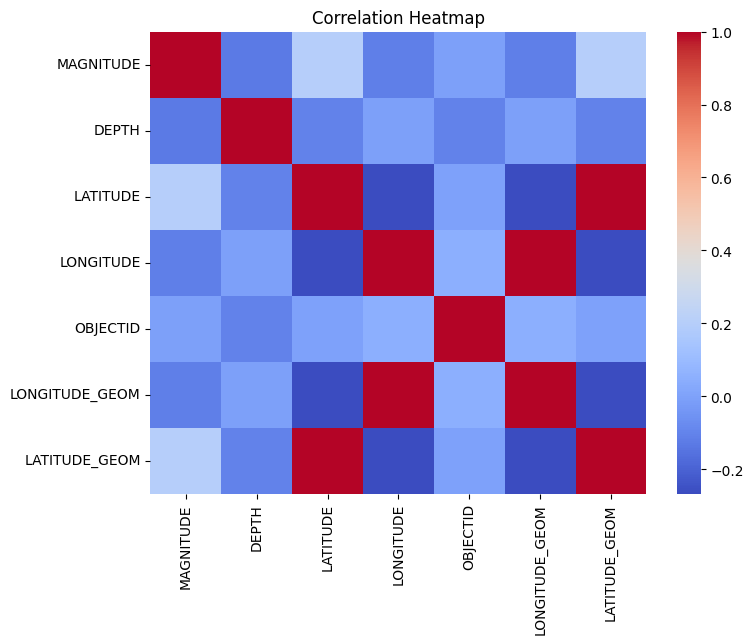

In [129]:
# --- STEP 3: CORRELATION HEATMAP ---
plt.figure(figsize=(8, 6))
numeric_df = df_reg.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

=========================================
🔵 PART B: CLASSIFICATION TASK
Dataset: Alternative Fuel Stations
=========================================


In [97]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [98]:
df_cls = pd.read_csv("alt_fuel_stations (Feb 18 2017).csv")
df_cls.head()


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types
0,CNG,Alagasco Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107.0,NaN,NaN,E,...,2017-01-18 02:53:29 UTC,T,NaN,NaN,2010-12-01,NaN,MD,NaN,NaN,NaN
1,CNG,Clean Energy - PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Avenue, left...",Atlanta,GA,30303.0,NaN,866-809-4869,E,...,2017-01-18 02:51:45 UTC,P,NaN,NaN,1994-07-15,NaN,MD,NaN,NaN,NaN
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324.0,NaN,NaN,E,...,2017-01-18 01:19:51 UTC,LG,NaN,NaN,1996-12-15,NaN,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336.0,NaN,NaN,E,...,2017-01-18 01:58:34 UTC,P,NaN,NaN,1997-01-01,NaN,HD,NaN,NaN,NaN
4,CNG,Clean Energy - Texas Department of Transportation,7721A Washington St,"I-10, Washington Ave exit, 1.5 blocks to the s...",Houston,TX,77007.0,NaN,866-809-4869,E,...,2017-01-18 01:48:57 UTC,P,NaN,NaN,1996-12-15,NaN,MD,NaN,NaN,NaN


In [99]:
import pandas as pd

# 1. Automatically find the correct column name
# This looks for any column that contains 'access' or 'code' (case-insensitive)
target_col = None
for col in df_cls.columns:
    c_clean = str(col).strip().lower()
    if 'access' in c_clean or 'code' in c_clean:
        target_col = col
        break

if target_col:
    print(f"Found column: '{target_col}'")

    # 2. Create the 'is_public' column using the found column
    df_cls['is_public'] = df_cls[target_col].apply(
        lambda x: 1 if str(x).strip().lower() == 'public' else 0
    )

    # 3. View results
    print(df_cls[[target_col, 'is_public']].head())
else:
    # If no column is found, list all columns so you can see what went wrong
    print("Error: Could not find a column named 'Access Code'.")
    print("Available columns are:", df_cls.columns.tolist())

Found column: 'Fuel Type Code'
  Fuel Type Code  is_public
0            CNG          0
1            CNG          0
2            CNG          0
3            CNG          0
4            CNG          0


In [100]:
features = ['Latitude', 'Longitude']
target = 'is_public'

df_cls = df_cls.dropna(subset=features)

X = df_cls[features]
y = df_cls[target]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [102]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

mlp_clf = MLPClassifier(
    hidden_layer_sizes=(64,32),
    activation='relu',
    max_iter=500,
    random_state=42
)

mlp_clf.fit(X_train_scaled, y_train)

y_pred_nn = mlp_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Precision:", precision_score(y_test, y_pred_nn))
print("Recall:", recall_score(y_test, y_pred_nn))
print("F1:", f1_score(y_test, y_pred_nn))


Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [103]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 1.0


In [104]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

y_pred_nn = mlp.predict(X_test_scaled)

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))


Neural Network Accuracy: 1.0


In [105]:
# Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ---------------------------
# Example Dataset (REMOVE if you already have data)
# ---------------------------
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# ---------------------------
# Train Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# ---------------------------
# Feature Scaling
# ---------------------------
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# Parameter Grid
# ---------------------------
param_grid = {
    'C': [0.01, 0.1, 1, 10]
}

# ---------------------------
# Stratified CV (prevents class errors)
# ---------------------------
cv = StratifiedKFold(n_splits=3)

# ---------------------------
# GridSearch
# ---------------------------
grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=cv,
    scoring='accuracy'
)

# ---------------------------
# Fit Model
# ---------------------------
grid.fit(X_train_scaled, y_train)

# ---------------------------
# Results
# ---------------------------
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# ---------------------------
# Test Accuracy
# ---------------------------
y_pred = grid.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'C': 0.1}
Best CV Score: 0.9802486348321132
Test Accuracy: 0.9736842105263158


In [106]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=2)
X_selected = selector.fit_transform(abs(X), y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))


Selected Features: ['mean area', 'worst area']


In [107]:
print(df.columns.tolist())


['magnitude_codelist', 'magnitude', 'magnitude_type', 'date', 'place', 'depth', 'latitude', 'longitude', 'OBJECTID', 'longitude_geom', 'latitude_geom']


In [108]:
selected_features = ['mean_area', 'worst_area']


In [109]:
print(df.columns)


Index(['magnitude_codelist', 'magnitude', 'magnitude_type', 'date', 'place',
       'depth', 'latitude', 'longitude', 'OBJECTID', 'longitude_geom',
       'latitude_geom'],
      dtype='object')
